In [ ]:
#Import librairies
import tweepy
from textblob import TextBlob
import pandas as pd 
import numpy as np
import re
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Upload the login dile 
from google.colab import files 
files.upload()

Saving Credentials_twitter.csv to Credentials_twitter.csv


{'Credentials_twitter.csv': b'api_key,api_key_secret,access_token,access_token_secret\r\n66rDlduMkbiXgPFBtGcaFTi5L,QZEjKmnJLKftVnjK3yQ2qvI9DcnKh03Thbr0JPmMi0usKzdUmM,2742647219-uiGXolmN0n1d0N9Cu8a29NSaDINqDzeiABFo8iy,qQmdUGMxaHrqNUoqAYoQTIpzZ37NQIZMARmvGQCNJqCnM'}

In [ ]:
#Store the data 
log = pd.read_csv('Credentials_twitter.csv')
print(log)

                     api_key  \
0  66rDlduMkbiXgPFBtGcaFTi5L   

                                      api_key_secret  \
0  QZEjKmnJLKftVnjK3yQ2qvI9DcnKh03Thbr0JPmMi0usKz...   

                                        access_token  \
0  2742647219-uiGXolmN0n1d0N9Cu8a29NSaDINqDzeiABF...   

                             access_token_secret  
0  qQmdUGMxaHrqNUoqAYoQTIpzZ37NQIZMARmvGQCNJqCnM  


In [ ]:
#Get the Twitter API credentials
Api_Key=log['api_key'][0]
Api_Key_Secret=log['api_key_secret'][0]
Access_Token=log['access_token'][0]
Access_Token_Secret=log['access_token_secret'][0]

In [ ]:

#Create the authentication object
authenticate = tweepy.OAuthHandler(Api_Key, Api_Key_Secret)
#Set the access token and the access token secret
authenticate.set_access_token(Access_Token, Access_Token_Secret)
#Create the API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)


In [ ]:
#gather tweets using trending hashtag
search_term = '#russiaukrainewar -filter:retweets'

#Create a cursor object

tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since_id='2020-11-01', tweet_mode= 'extended').items(5000)

# #Store the tweets in a variable and get the full text

data = [tweet.full_text for tweet in tweets]


In [ ]:
df = pd.DataFrame(data, columns=['Tweets'])
#df['likes'] = np.array([tweet.favorite_count for tweet in tweets])

In [ ]:
df.head(20)

,Tweets
0,🇷🇺🇺🇦According to the #Soledar Battlegroup of t...
1,The New York Times Discovers Ukraine’s Neo-Naz...
2,Russia captures French Caesar self-propelled g...
3,"Joe Biden \n""God forbid we have a conflict wit..."
4,"Our ""Tracking Ukraine-Russia Ceasefire Negotia..."
5,Street fights on the outskirts of Soledar. The...
6,"🇺🇦🇷🇺 In the direction of Raygorodok, the Ukrai..."
7,🇺🇦🇷🇺 At least 15 units of the Ukrainian forces...
8,🇺🇦🇷🇺 There are reports that the Russians have ...
9,Poland prepares its troops for large-scale ope...


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
#Removing all stopwords

def CleanTweet(txt):

  txt = txt.lower()
  txt = re.sub("'", "", txt) 
  txt = re.sub("@[A-Za-z0-9_]+","", txt)
  txt = re.sub("#[A-Za-z0-9_]+","", txt)
  txt = re.sub(r'http\S+', '', txt)
  txt = re.sub('[()!?]', ' ', txt)
  txt = re.sub('\[.*?\]',' ', txt)
  txt = re.sub("[^a-z0-9]"," ", txt)
  txt = re.sub('https?:\/\/\S+', '',txt)
  txt = txt.split()
  stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from","https"]
  txt = [w for w in txt if not w in stopwords]
  txt = " ".join(word for word in txt)
  return txt

In [ ]:
df.head(10)

,Tweets
0,🇷🇺🇺🇦According to the #Soledar Battlegroup of t...
1,The New York Times Discovers Ukraine’s Neo-Naz...
2,Russia captures French Caesar self-propelled g...
3,"Joe Biden \n""God forbid we have a conflict wit..."
4,"Our ""Tracking Ukraine-Russia Ceasefire Negotia..."
5,Street fights on the outskirts of Soledar. The...
6,"🇺🇦🇷🇺 In the direction of Raygorodok, the Ukrai..."
7,🇺🇦🇷🇺 At least 15 units of the Ukrainian forces...
8,🇺🇦🇷🇺 There are reports that the Russians have ...
9,Poland prepares its troops for large-scale ope...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  886 non-null    object
dtypes: object(1)
memory usage: 7.0+ KB


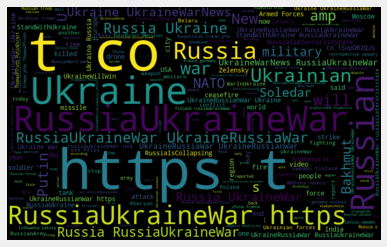

In [ ]:
#Visualizing the data with Word Cloud
words = ' '.join(twts for twts in df['Tweets'])
wordCloud = WordCloud (width = 800, height=500, random_state = 21, max_font_size = 119).generate(words)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

In [ ]:
def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity


In [ ]:
df['Subjectivity']=df['Tweets'].apply(getTextSubjectivity)
df['Polarity']=df['Tweets'].apply(getTextPolarity)

In [ ]:
df.head(10)

,Tweets,Subjectivity,Polarity
0,🇷🇺🇺🇦According to the #Soledar Battlegroup of t...,1.000000,0.000000
1,The New York Times Discovers Ukraine’s Neo-Naz...,0.454545,0.136364
2,Russia captures French Caesar self-propelled g...,0.000000,0.000000
3,"Joe Biden \n""God forbid we have a conflict wit...",0.212500,-0.062500
4,"Our ""Tracking Ukraine-Russia Ceasefire Negotia...",0.687500,0.387500
5,Street fights on the outskirts of Soledar. The...,0.100000,-0.100000
6,"🇺🇦🇷🇺 In the direction of Raygorodok, the Ukrai...",0.000000,0.000000
7,🇺🇦🇷🇺 At least 15 units of the Ukrainian forces...,0.400000,-0.300000
8,🇺🇦🇷🇺 There are reports that the Russians have ...,0.566667,-0.133333
9,Poland prepares its troops for large-scale ope...,0.500000,0.500000


In [ ]:
def getTextAnalysis(Pol):
  if Pol>0:
    return 'Positive'
  elif Pol==0:
    return 'Neutral'
  else:
    return 'Negative'

In [ ]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [ ]:
df.head(10)

,Tweets,Subjectivity,Polarity,Score
0,🇷🇺🇺🇦According to the #Soledar Battlegroup of t...,1.000000,0.000000,Neutral
1,The New York Times Discovers Ukraine’s Neo-Naz...,0.454545,0.136364,Positive
2,Russia captures French Caesar self-propelled g...,0.000000,0.000000,Neutral
3,"Joe Biden \n""God forbid we have a conflict wit...",0.212500,-0.062500,Negative
4,"Our ""Tracking Ukraine-Russia Ceasefire Negotia...",0.687500,0.387500,Positive
5,Street fights on the outskirts of Soledar. The...,0.100000,-0.100000,Negative
6,"🇺🇦🇷🇺 In the direction of Raygorodok, the Ukrai...",0.000000,0.000000,Neutral
7,🇺🇦🇷🇺 At least 15 units of the Ukrainian forces...,0.400000,-0.300000,Negative
8,🇺🇦🇷🇺 There are reports that the Russians have ...,0.566667,-0.133333,Negative
9,Poland prepares its troops for large-scale ope...,0.500000,0.500000,Positive


In [ ]:
positive = df[df['Score']=='Positive']
print(str((positive.shape[0])/(df.shape[0])*100) + '% of positive tweets')
pos=positive.shape[0]/df.shape[0]*100

37.58465011286682% of positive tweets


In [ ]:
negative = df[df['Score']=='Negative']
print(str((negative.shape[0])/(df.shape[0])*100) + '% of Negative tweets')
neg=negative.shape[0]/df.shape[0]*100

20.993227990970656% of Negative tweets


In [ ]:
neutral = df[df['Score']=='Neutral']
print(str((neutral.shape[0])/(df.shape[0])*100) + '% of Neutral tweets')
neutral=neutral.shape[0]/df.shape[0]*100

41.42212189616253% of Neutral tweets


In [ ]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes = [pos, neg, neutral]
colors=['gold','silver','lightcoral']

(-1.1194092717748922,
 1.1228499634131108,
 -1.2223053327449052,
 1.1264223751378506)

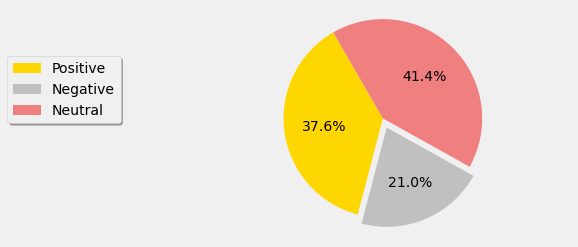

In [ ]:
plt.pie(sizes, explode=explode, colors=colors,autopct='%1.1f%%', startangle=120)
plt.legend(labels, loc=(-0.5,0.5),  shadow=True)
plt.axis('equal')


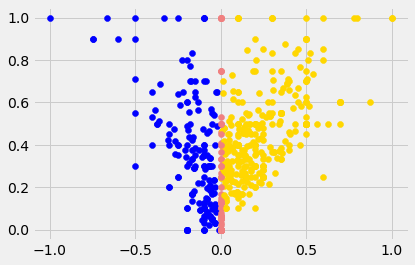

In [ ]:
for index, row in df.iterrows():
  if row['Score']=='Positive':
    plt.scatter(row['Polarity'],row['Subjectivity'],color='gold')
  elif row['Score']=='Negative':
    plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
  elif row['Score']=='Neutral':
    plt.scatter(row['Polarity'],row['Subjectivity'],color='lightcoral')